### PASCAL SEIHON

Artículo en Medium:
https://medium.com/@seihon17/clasificaci%C3%B3n-de-sentimientos-en-rese%C3%B1as-de-pel%C3%ADculas-naive-bayes-vs-red-neuronal-de8cd68ecda5

# Fase 1: Cargar y Preprocesar el Dataset

In [9]:
import nltk
import re
import string
from nltk.corpus import stopwords, movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Descargar recursos necesarios
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Cargar el dataset
reviews = [(movie_reviews.raw(fileid), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

In [45]:
# Preprocesamiento
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # minúsculas
    text = re.sub(r'\d+', '', text)  # eliminar números
    text = text.translate(str.maketrans('', '', string.punctuation))  # eliminar puntuación
    tokens = nltk.word_tokenize(text)  # tokenizar
    filtered = [word for word in tokens if word not in stop_words]  # eliminar stopwords
    return ' '.join(filtered)

# Aplicar el preprocesamiento
texts, labels = zip(*reviews)
texts_clean = [preprocess(text) for text in texts]

In [47]:
# Vectorización
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts_clean)
y = labels

FASE 2: Entrenamiento de Modelos

Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
#División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Entrenar el modelo
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Red Neuronal (Keras)

In [29]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 6.3/376.0 MB 32.1 MB/s eta 0:00:12
   - -------------------------------------- 12.8/376.0 MB 32.2 MB/s eta 0:00:12
   - -------------------------------------- 18.4/376.0 MB 28.9 MB/s eta 0:00:13
   -- ------------------------------------- 21.0/376.0 MB 25.0 MB/s eta 0:00:15
   -- ------------------------------------- 23.6/376.0 MB 22.3 MB/s eta 0:00:16
   -- ------------------------------------- 26.7/376.0 MB 20.9 MB/s eta 0:00:17
   --- ------------------------------------ 30.1/376.0 MB 20.3 MB/s eta 0:00:17
   --- ------------------------------------ 34.1/376.0 MB 20.0 MB/s eta 0:00:18
   ---- ----------------------------------- 38.0/376.0 MB 19.8 MB/s eta 0:00:18
   ---- ----------------------------------- 42.7/376.0 MB 20.0 MB/s eta 0:00:17
   ---- ----------------------------------- 46.9/376.0 MB 19.9 MB/s eta 0:00:17
   ----- ---------------------------------- 50.3/3

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Codificar etiquetas a 0 y 1
encoder = LabelEncoder()
y_bin = encoder.fit_transform(y)
y_train_bin, y_test_bin = train_test_split(y_bin, test_size=0.2, random_state=42)

In [57]:
# Crear modelo
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\pasca\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Entrenar
nn_model.fit(X_train.toarray(), y_train_bin, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7750 - loss: 0.4753 - val_accuracy: 0.8438 - val_loss: 0.3313
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9958 - loss: 0.0417 - val_accuracy: 0.8687 - val_loss: 0.3220
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.8687 - val_loss: 0.3164
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.8750 - val_loss: 0.3180
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8687 - val_loss: 0.3232


# FASE 3: Evaluación de los Modelos

In [61]:
from sklearn.metrics import accuracy_score, classification_report

# --- Naive Bayes ---
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

# --- Red Neuronal ---
y_pred_nn = nn_model.predict(X_test.toarray())
y_pred_nn_label = [1 if p > 0.5 else 0 for p in y_pred_nn]

print("Red Neuronal Accuracy:", accuracy_score(y_test_bin, y_pred_nn_label))
print("Red Neuronal Report:\n", classification_report(y_test_bin, y_pred_nn_label))


Naive Bayes Accuracy: 0.8175
Naive Bayes Report:
               precision    recall  f1-score   support

         neg       0.80      0.85      0.82       199
         pos       0.84      0.79      0.81       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Red Neuronal Accuracy: 0.845
Red Neuronal Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       199
           1       0.86      0.83      0.84       201

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.84       400
weighted avg       0.85      0.84      0.84       400



In [ ]:
# FASE 4: Visualización

C:\Users\pasca\AppData\Local\Temp\ipykernel_33376\3252041452.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df, palette='viridis')


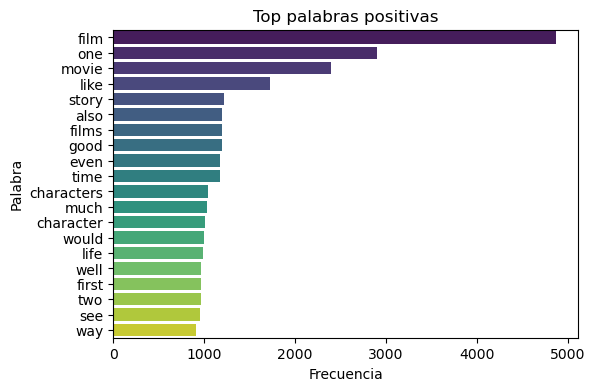

C:\Users\pasca\AppData\Local\Temp\ipykernel_33376\3252041452.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df, palette='viridis')


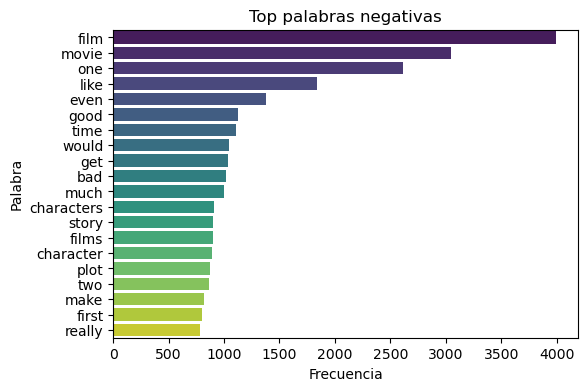

In [97]:
#Palabras más frecuentes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Agrupar por clase
texts_by_class = {'pos': [], 'neg': []}
for text, label in zip(texts_clean, y):
    texts_by_class[label].append(text)

def plot_top_words(texts, title):
    all_words = ' '.join(texts).split()
    freq = Counter(all_words)
    common_words = freq.most_common(20)
    df = pd.DataFrame(common_words, columns=['word', 'count'])
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='count', y='word', data=df, palette='viridis')
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()

plot_top_words(texts_by_class['pos'], "Top palabras positivas")
plot_top_words(texts_by_class['neg'], "Top palabras negativas")


In [ ]:
#Matriz de Confusión y Curva ROC

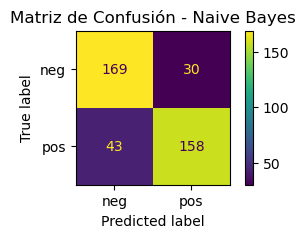

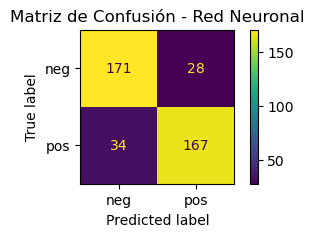

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

# Matriz de confusión - Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['neg', 'pos'])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['neg', 'pos'])
fig, ax = plt.subplots(figsize=(4, 2))
disp_nb.plot(ax=ax)
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

# Matriz de confusión - Red Neuronal
cm_nn = confusion_matrix(y_test_bin, y_pred_nn_bin, labels=[0, 1])
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['neg', 'pos'])
fig, ax = plt.subplots(figsize=(4, 2))
disp_nn.plot(ax=ax)
plt.title("Matriz de Confusión - Red Neuronal")
plt.show()


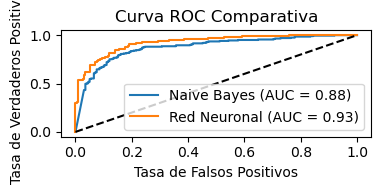

In [81]:

# ---------- CURVA ROC COMPARATIVA ----------
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, y_proba_nb)
auc_nb = roc_auc_score(y_test_bin, y_proba_nb)

fpr_nn, tpr_nn, _ = roc_curve(y_test_bin, y_pred_nn)
auc_nn = roc_auc_score(y_test_bin, y_pred_nn)

plt.figure(figsize=(4, 2))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Red Neuronal (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Comparativa")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#Fase 5: Escribir y Publicar un Artículo en Medium:
Reflexionar sobre el proceso de trabajo, los resultados obtenidos y las lecciones aprendidas.

Comparar el rendimiento de los modelos utilizados y discutir cómo los enfoques tradicionales y las redes neuronales se complementan en tareas de procesamiento de lenguaje natural.

Resumir lo aprendido durante todo el curso, enfocándote en los aspectos más importantes y destacando las técnicas más útiles que has aprendido.

Artículo en Medium:
https://medium.com/@seihon17/clasificaci%C3%B3n-de-sentimientos-en-rese%C3%B1as-de-pel%C3%ADculas-naive-bayes-vs-red-neuronal-de8cd68ecda5